In [1]:
import talos as ta

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\chances\plots.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  Fi

In [2]:
r = ta.Reporting('./hasil/3layer.csv')

In [3]:
# get the number of rounds in the Scan
r.rounds()

502

In [4]:
# get the highest result ('val_acc' by default)
r.high()

0.833348119

In [5]:
# get the highest result for any metric
r.high('acc')

0.99915855

In [6]:
# get the round with the best result
r.rounds2high('val_acc')

273

In [7]:
# get the best paramaters
r.best_params('val_acc')

array([['he_uniform', 50, "<class 'keras.optimizers.Adam'>", 0.01, 256,
        30, 100, 0, '<function relu at 0x000001A0ACA80EA0>', 20, 0],
       ['glorot_uniform', 50, "<class 'keras.optimizers.Adam'>", 0.01,
        256, 30, 60, 0, '<function relu at 0x000001A0ACA80EA0>', 20, 1],
       ['glorot_normal', 50, "<class 'keras.optimizers.Adam'>", 0.1, 256,
        30, 60, 0, '<function relu at 0x000001A0ACA80EA0>', 40, 2],
       ['normal', 50, "<class 'keras.optimizers.Adam'>", 0.01, 256, 30,
        100, 0, '<function elu at 0x000001A0ACA80C80>', 50, 3],
       ['glorot_normal', 50, "<class 'keras.optimizers.Adam'>", 0.01, 64,
        30, 80, 0, '<function relu at 0x000001A0ACA80EA0>', 50, 4],
       ['he_uniform', 50, "<class 'keras.optimizers.Adam'>", 0.01, 256,
        30, 100, 0, '<function selu at 0x000001A09D099EA0>', 30, 5],
       ['lecun_normal', 50, "<class 'keras.optimizers.Adam'>", 0.01, 32,
        30, 60, 0, "<class 'keras.layers.advanced_activations.PReLU'>",
        4

In [8]:
# get correlation for hyperparameters against a metric
r.correlate('loss')

first_neuron     0.037258
second_neuron    0.068639
batch_size      -0.062733
epochs                NaN
epochs2               NaN
dropout               NaN
lr               0.612025
Name: loss, dtype: float64

In [9]:
# get correlation for hyperparameters against a metric
r.correlate('acc')

first_neuron    -0.034639
second_neuron   -0.065125
batch_size       0.062226
epochs                NaN
epochs2               NaN
dropout               NaN
lr              -0.625667
Name: acc, dtype: float64

In [10]:
# get correlation for hyperparameters against a metric
r.correlate('val_acc')

first_neuron    -0.014643
second_neuron   -0.029837
batch_size       0.077582
epochs                NaN
epochs2               NaN
dropout               NaN
lr              -0.702592
Name: val_acc, dtype: float64

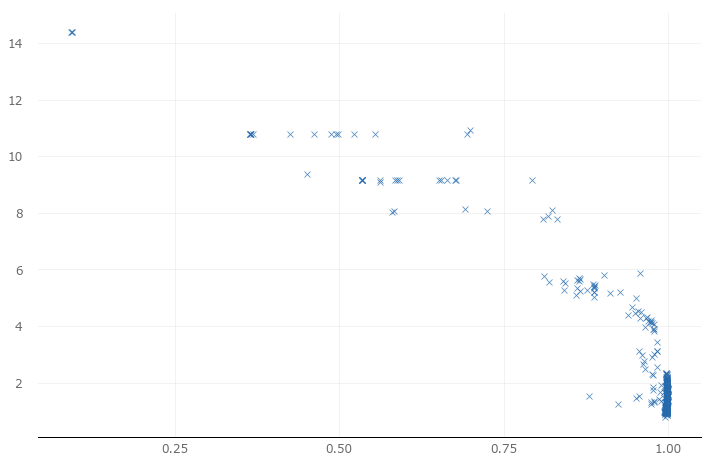

In [11]:
# a regression plot for two dimensions 
r.plot_regs('acc')

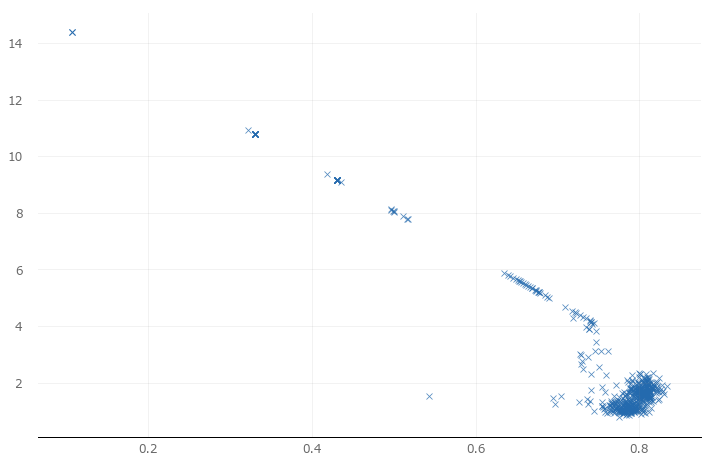

In [12]:
# a regression plot for two dimensions 
r.plot_regs('val_acc')

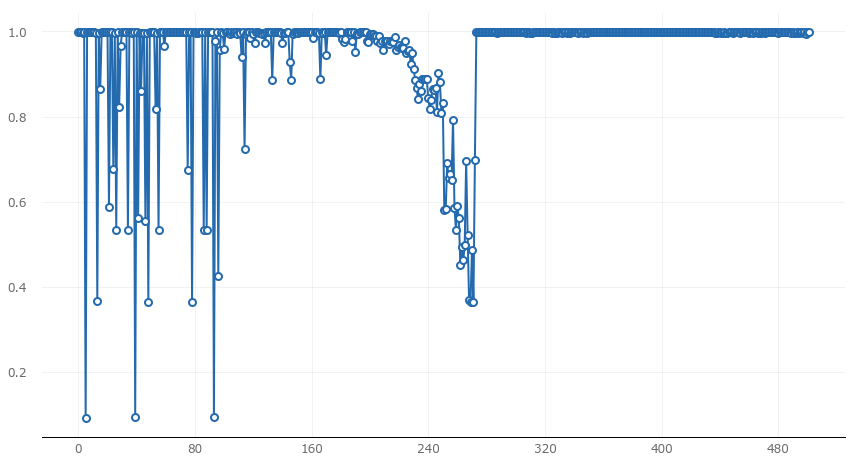

In [13]:
# line plot
r.plot_line('acc')

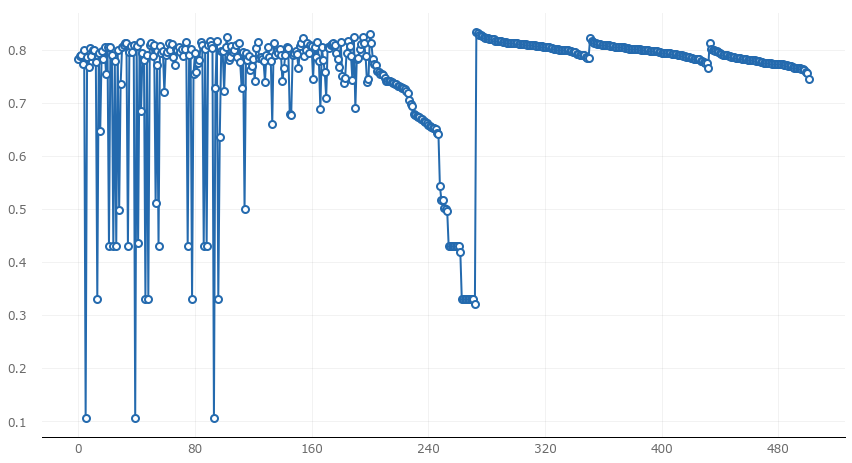

In [14]:
# line plot
r.plot_line('val_acc')

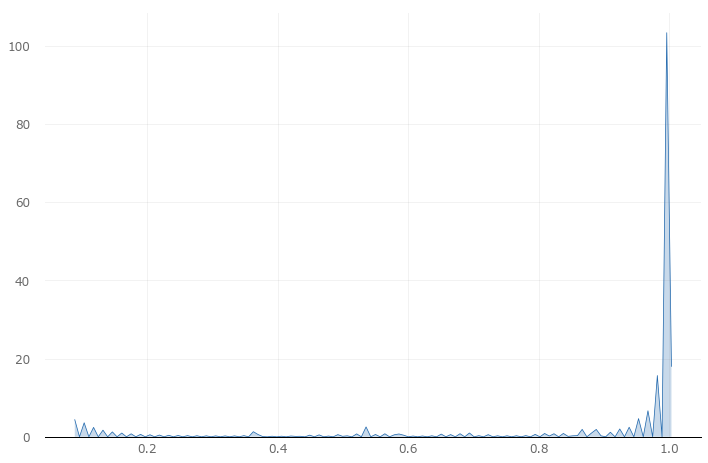

In [15]:
# up to two dimensional kernel density estimator
r.plot_kde('acc')

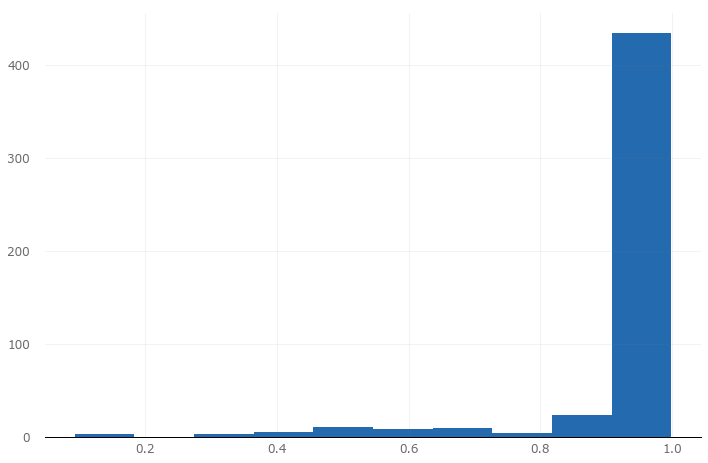

In [16]:

# a simple histogram
r.plot_hist('acc')

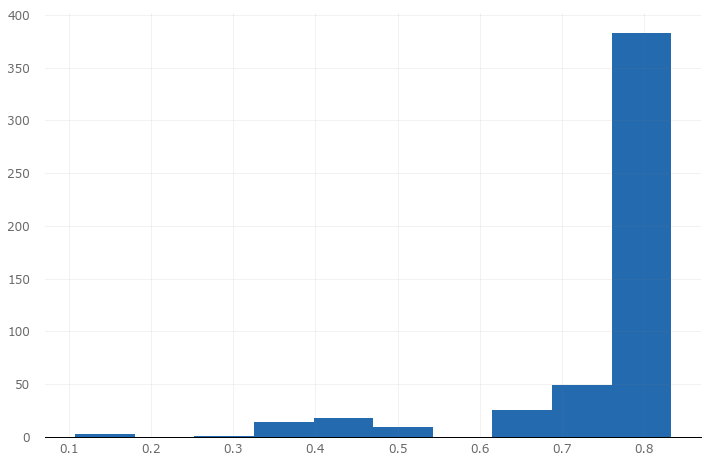

In [17]:

# a simple histogram
r.plot_hist('val_acc')

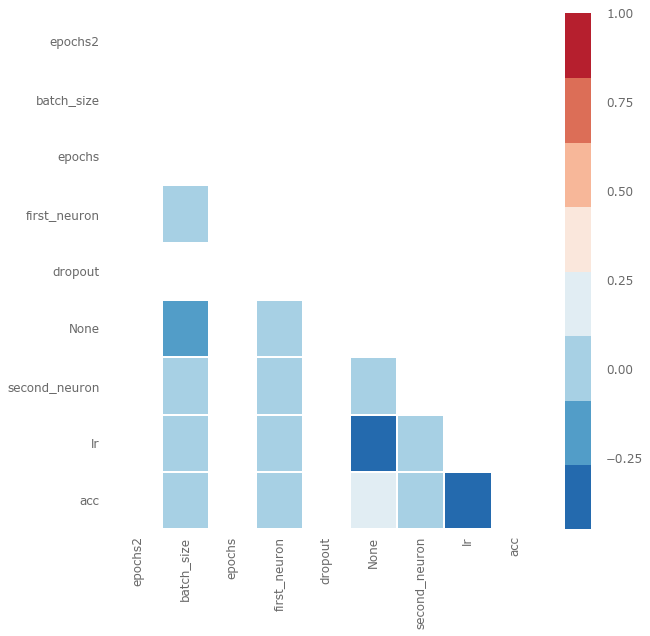

In [18]:
# heatmap correlation
r.plot_corr('acc')

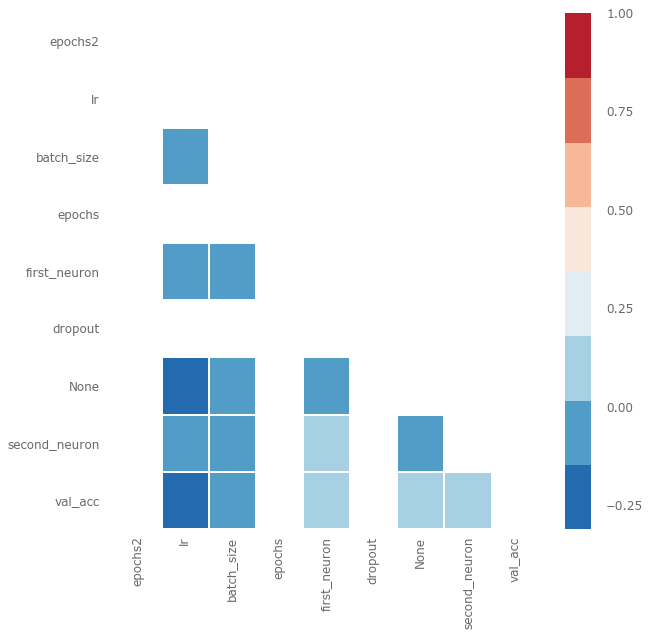

In [19]:
# heatmap correlation
r.plot_corr('val_acc')

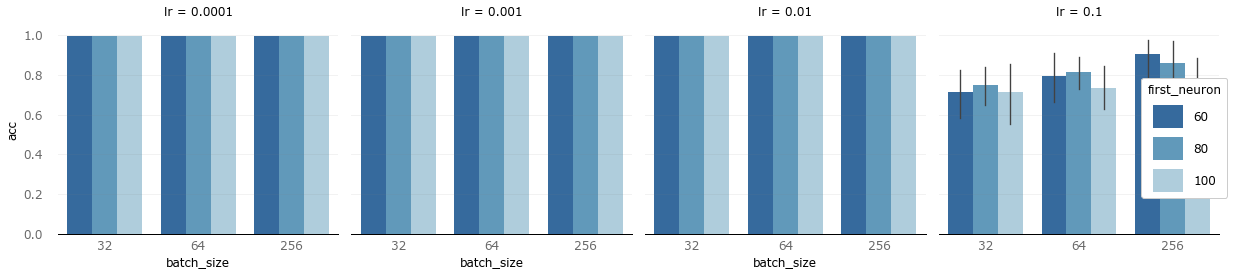

In [20]:
# a four dimensional bar grid
r.plot_bars('batch_size', 'acc', 'first_neuron', 'lr')


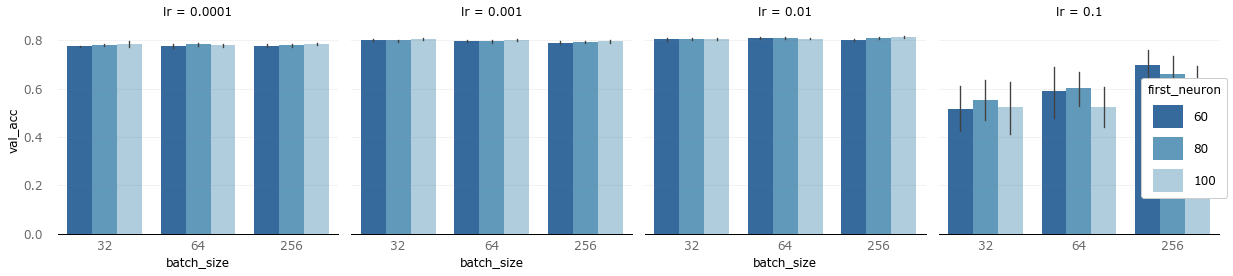

In [21]:
# a four dimensional bar grid
r.plot_bars('batch_size', 'val_acc', 'first_neuron', 'lr')

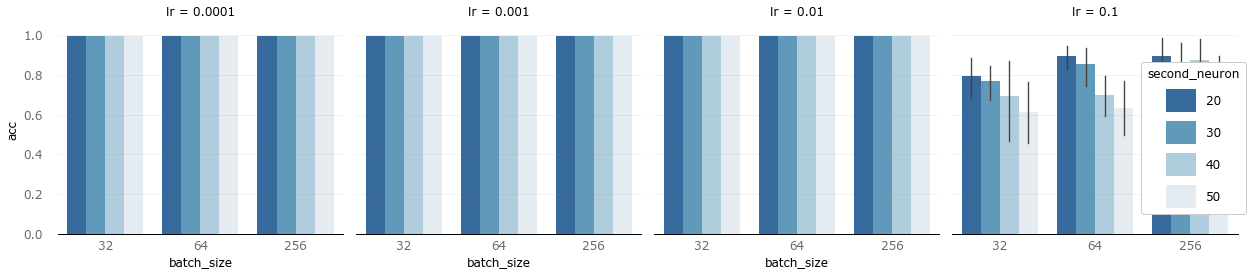

In [22]:
# a four dimensional bar grid
r.plot_bars('batch_size', 'acc', 'second_neuron', 'lr')

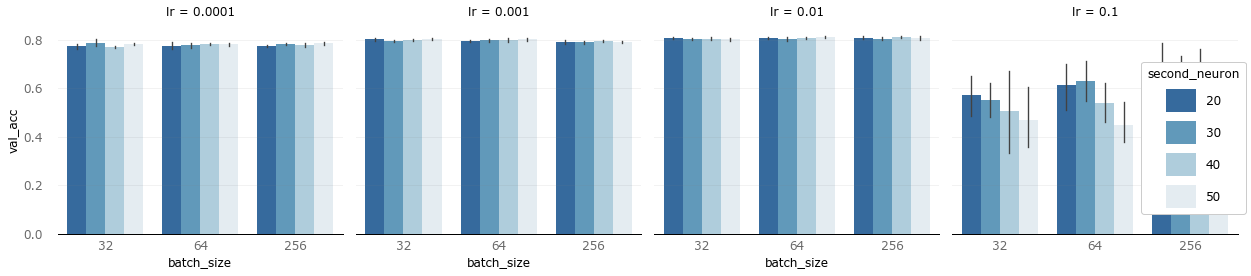

In [23]:
# a four dimensional bar grid
r.plot_bars('batch_size', 'val_acc', 'second_neuron', 'lr')

# Matrik Confusion

### Open Data

In [24]:
import numpy as np
def load_matrices(file_name):
    with open(file_name, 'rb') as f:
        A = np.load(f)
        B = np.load(f)
        C = np.load(f)
        D = np.load(f)
        E = np.load(f)
        F = np.load(f)
    return (A,B,C,D,E,F)

In [25]:
my_file = '../data_NSL/data.npy'
train, test, test2, y_train, y_test, y_test2 = load_matrices(my_file)

### Create Model

Karena pada best model fungsi aktivasi yang tersimpan sebagai 'lrelu', tidak dikenali pada saat load model maka model perludibuat secara manual. Bobot kemudian akan diload dari hasil terbaik. 


In [26]:
from keras.layers import Input,Dense
from keras.models import Model, Sequential
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.advanced_activations import PReLU
from keras.models import load_model
#actvation leakyrelu
LR= LeakyReLU(0.01)
LR.__name__ = 'lrelu'

In [27]:
# load model
filepath='./hasil/best3relu.hdf5'
dnn=load_model(filepath)
dnn.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 122)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               12300     
_________________________________________________________________
dense_2 (Dense)              (None, 20)                2020      
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 105       
Total params: 14,425
Trainable params: 14,425
Non-trainable params: 0
_________________________________________________________________


In [28]:
##loading dnn untuk data 
# load weights

dnn.load_weights(filepath)
# Compile model (required to make predictions)
dnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Created model and loaded weights from file")

result_train = dnn.evaluate(train,y_train)
for name, value in zip(dnn.metrics_names, result_train):
    print(name, value)
    
print("%s: %.2f%%" % (dnn.metrics_names[1], result_train[1]*100))

Created model and loaded weights from file
125973/125973 [==============================] - 12s 93us/step
loss 0.00569575755030212
acc 0.9980630770085653
acc: 99.81%


In [29]:
##prediksi data Train

preds = dnn.predict(train)
pred_lbls = np.argmax(preds, axis=1)
true_lbls = np.argmax(y_train, axis=1)

In [30]:
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [31]:
from sklearn.metrics import classification_report
outcomes = ['Normal','DoS','Probe' ,'R2L', 'U2R']
class_names=outcomes


target_names = ["Class {}".format(i) for i in range(5)]
print(classification_report(true_lbls, pred_lbls, target_names=class_names,labels=[1, 0, 2, 3,4], digits=5))
#print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

      Normal    0.99862   0.99783   0.99822     67343
         DoS    0.99989   0.99980   0.99985     45927
       Probe    0.99165   0.99794   0.99478     11656
         R2L    0.95762   0.95377   0.95569       995
         U2R    0.84615   0.63462   0.72527        52

    accuracy                        0.99806    125973
   macro avg    0.95879   0.91679   0.93476    125973
weighted avg    0.99805   0.99806   0.99805    125973



In [32]:
plt.rcParams.update(plt.rcParamsDefault)

Confusion matrix, without normalization
[[67197     4    97    40     5]
 [    9 45918     0     0     0]
 [   23     1 11632     0     0]
 [   45     0     0   949     1]
 [   16     0     1     2    33]]


<Figure size 640x480 with 0 Axes>

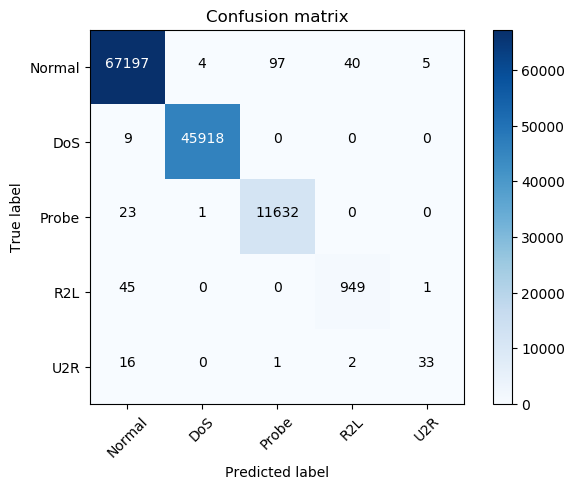

In [33]:
#outcomes = ['DoS', 'normal','Probe' ,'R2L', 'U2R']
class_names=outcomes

results = confusion_matrix(true_lbls, pred_lbls, labels=[1, 0, 2, 3,4])

# Plot non-normalized confusion matrix
plt.clf()
plt.figure()
plot_confusion_matrix(results, classes=class_names,
                      title='Confusion matrix')

#print(classification_report(y_test, deepprediction, target_names=class_names, digits=5))

## Data Test

In [34]:
#Data Test
result_test = dnn.evaluate(test,y_test)
for name, value in zip(dnn.metrics_names, result_test):
    print(name, value)
    
print("%s: %.2f%%" % (dnn.metrics_names[1], result_test[1]*100))

22544/22544 [==============================] - 2s 92us/step
loss 2.179998772524197
acc 0.8333481192334989
acc: 83.33%


In [35]:
##prediksi data Train
#y_test=y_test.to_numpy()

preds = dnn.predict(test)
pred_lbls = np.argmax(preds, axis=1)
true_lbls = np.argmax(y_test, axis=1)

              precision    recall  f1-score   support

      Normal    0.75543   0.96694   0.84820      9711
         DoS    0.95441   0.83937   0.89320      7458
       Probe    0.83482   0.85171   0.84318      2421
         R2L    0.99159   0.38526   0.55492      2754
         U2R    0.93333   0.07000   0.13023       200

    accuracy                        0.83335     22544
   macro avg    0.89392   0.62266   0.65395     22544
weighted avg    0.86021   0.83335   0.82035     22544

Confusion matrix, without normalization
[[9390   86  232    2    1]
 [1140 6260   58    0    0]
 [ 158  199 2062    2    0]
 [1665   14   14 1061    0]
 [  77    0  104    5   14]]


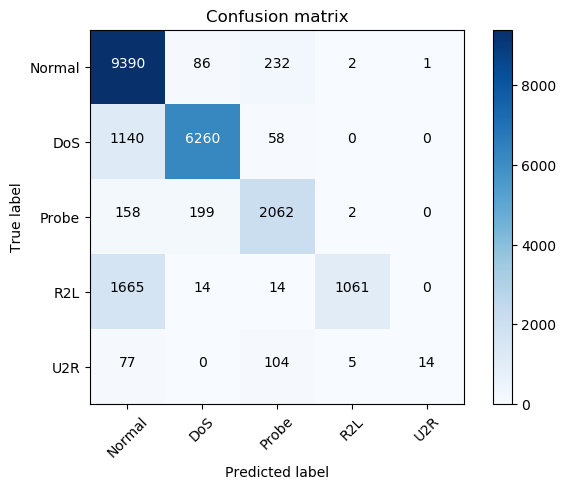

In [36]:
target_names = ["Class {}".format(i) for i in range(5)]
print(classification_report(true_lbls, pred_lbls, target_names=class_names,labels=[1, 0, 2, 3,4], digits=5))


results = confusion_matrix(true_lbls, pred_lbls, labels=[1, 0, 2, 3,4])

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(results, classes=class_names,
                      title='Confusion matrix')

#print(classification_report(y_test, deepprediction, target_names=class_names, digits=5))